Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0877 - val_loss: 0.0050
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 9/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 10/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 11/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 12/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

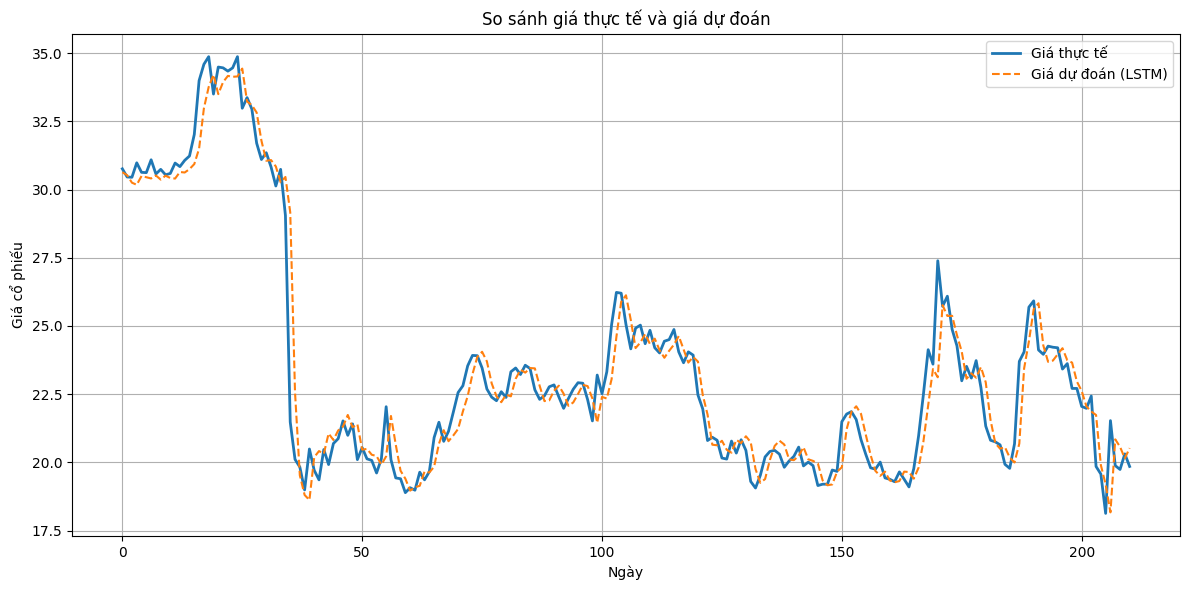

MAE  (Mean Absolute Error): 0.6632
RMSE (Root Mean Squared Error): 1.0200
MAPE (Mean Absolute Percentage Error): 2.88%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━

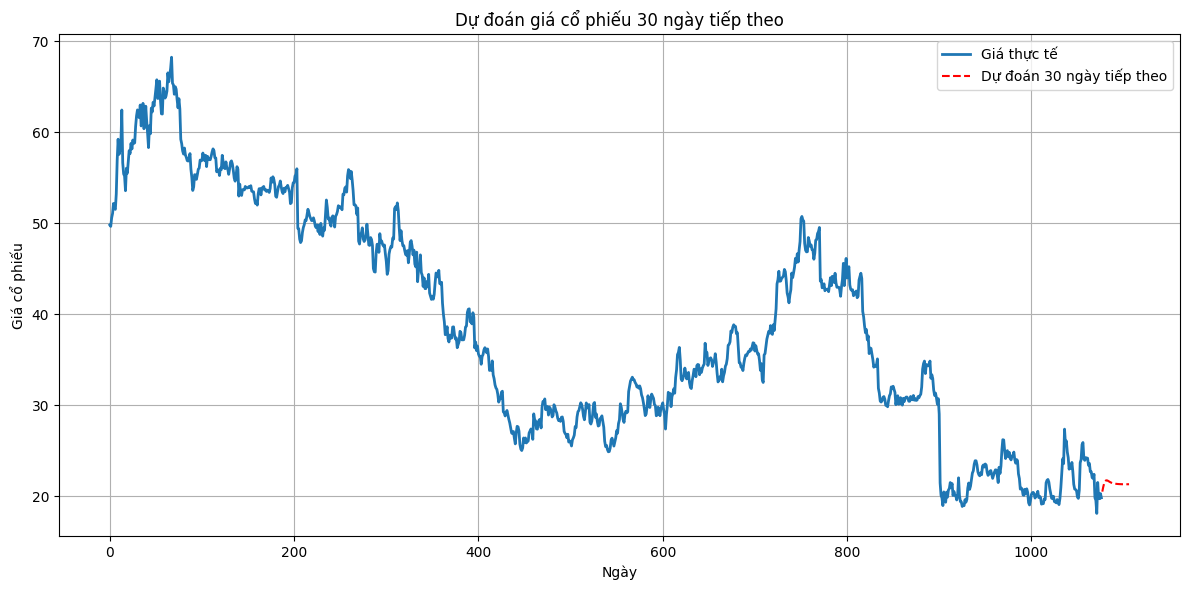

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input

# Đọc dữ liệu
file_path = "../../Dataset/intel_stock_price.csv"
df = pd.read_csv(file_path)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df = df.sort_values("Date").reset_index(drop=True)

# Xử lý Volume và Change %
def parse_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '').replace(',', '')) * 1e6
        elif 'B' in vol:
            return float(vol.replace('B', '').replace(',', '')) * 1e9
    return np.nan

df["Vol."] = df["Vol."].apply(parse_volume)
df["Change %"] = df["Change %"].str.replace('%', '').astype(float)

# Lọc dữ liệu cần thiết
features = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
df = df[features].dropna()

# Chuẩn hóa tất cả đặc trưng
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Tạo chuỗi thời gian
window_size = 30

def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i])
        y.append(data[i, 0])  # 'Price' là cột đầu tiên
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(data_scaled, window_size)

# Chia dữ liệu train/val/test
n_samples = X_all.shape[0]
train_size = int(n_samples * 0.7)
val_size = int(n_samples * 0.1)

X_train = X_all[:train_size]
y_train = y_all[:train_size]
X_val = X_all[train_size:train_size + val_size]
y_val = y_all[train_size:train_size + val_size]
X_test = X_all[train_size + val_size:]
y_test = y_all[train_size + val_size:]

# Xây dựng mô hình
model = Sequential([
    Input(shape=(window_size, X_train.shape[2])),
    LSTM(100, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    LSTM(50, activation='tanh'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Huấn luyện
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, batch_size=16,
          validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

# Dự đoán
y_pred_scaled = model.predict(X_test)
# Chỉ nghịch biến Price, nên cần scaler riêng
price_scaler = MinMaxScaler()
price_scaler.min_, price_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
y_pred = price_scaler.inverse_transform(y_pred_scaled)
y_true = price_scaler.inverse_transform(y_test.reshape(-1, 1))

# Vẽ kết quả
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Giá thực tế', linewidth=2)
plt.plot(y_pred, label='Giá dự đoán (LSTM)', linestyle='--')
plt.title('So sánh giá thực tế và giá dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Đánh giá
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape * 100:.2f}%")

# Dự đoán 30 ngày tiếp theo
n_future_days = 30
last_sequence = X_test[-1:]

predictions = []
for _ in range(n_future_days):
    pred_scaled = model.predict(last_sequence)
    predictions.append(pred_scaled[0, 0])
    # Cập nhật sequence
    next_input = last_sequence.copy()
    next_input = np.roll(next_input, -1, axis=1)
    # Giá trị mới có tất cả feature, nhưng ta chỉ biết Price dự đoán => giả định các đặc trưng khác không đổi
    next_input[0, -1, :] = last_sequence[0, -1, :]
    next_input[0, -1, 0] = pred_scaled[0, 0]
    last_sequence = next_input

# Inverse transform chỉ cho giá
future_predictions = price_scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Tạo mảng thời gian tương lai
last_date = df.index[-1]
future_dates = [df.index[-1] + i for i in range(1, n_future_days + 1)]

# Vẽ
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Giá thực tế', linewidth=2)
plt.plot(future_dates, future_predictions, label='Dự đoán 30 ngày tiếp theo', linestyle='--', color='red')
plt.title('Dự đoán giá cổ phiếu 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
